In [1]:
from statsbombpy import sb
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

In [2]:
text_color = 'w'

In [3]:
#select World Cup 2018 matches data from stastbomb API 
sb.matches(competition_id=43,season_id=3)

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,7581,2018-07-01,20:00:00.000,International - FIFA World Cup,2018,Croatia,Denmark,1,1,available,unscheduled,2020-07-29T05:00,None,4,Round of 16,Stadion Nizhny Novgorod,N. Pitana,1.0.2,None,None
1,7549,2018-06-22,17:00:00.000,International - FIFA World Cup,2018,Nigeria,Iceland,2,0,available,unscheduled,2020-07-29T05:00,None,2,Group Stage,Volgograd Arena,M. Conger,1.0.2,None,None
2,7555,2018-06-24,20:00:00.000,International - FIFA World Cup,2018,Poland,Colombia,0,3,available,unscheduled,2020-07-29T05:00,None,2,Group Stage,Kazan' Arena (Kazan'),C. Ramos,1.0.2,None,None
3,7529,2018-06-16,21:00:00.000,International - FIFA World Cup,2018,Croatia,Nigeria,2,0,available,unscheduled,2020-07-29T05:00,None,1,Group Stage,Stadion Kaliningrad,Sandro Ricci,1.0.2,None,None
4,7548,2018-06-22,14:00:00.000,International - FIFA World Cup,2018,Brazil,Costa Rica,2,0,available,unscheduled,2020-07-29T05:00,None,2,Group Stage,Saint-Petersburg Stadium,B. Kuipers,1.0.2,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,8657,2018-07-14,16:00:00.000,International - FIFA World Cup,2018,Belgium,England,2,0,available,unscheduled,2020-07-29T05:00,None,7,3rd Place Final,Saint-Petersburg Stadium,A. Faghani,1.0.2,None,None
60,7540,2018-06-19,20:00:00.000,International - FIFA World Cup,2018,Russia,Egypt,3,1,available,unscheduled,2020-07-29T05:00,None,2,Group Stage,Saint-Petersburg Stadium,E. Cáceres,1.0.2,None,None
61,7551,2018-06-23,20:00:00.000,International - FIFA World Cup,2018,Germany,Sweden,2,1,available,unscheduled,2020-07-29T05:00,None,2,Group Stage,Olimpiyskiy Stadion Fisht,S. Marciniak,1.0.2,None,None
62,7550,2018-06-22,20:00:00.000,International - FIFA World Cup,2018,Serbia,Switzerland,1,2,available,unscheduled,2020-07-29T05:00,None,2,Group Stage,Stadion Kaliningrad,F. Brych,1.0.2,None,None


In [4]:
#select event data of desired match (Germnay vs Sweden)
events = sb.events(match_id = 7551)
events.head()

credentials were not supplied. open data access only


,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,counterpress,dribble_nutmeg,dribble_outcome,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4321, 'lineup': [{'player': {'id...",Germany,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",Sweden,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Germany,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sweden,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sweden,00:00:00.000,Half Start,NaN


In [5]:
#observe available columns
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_rec

In [6]:
#Select desired columns (Shots taken by Germany throughout the match)
events = events[['team','player','type','minute','location','shot_type','shot_outcome']]
shotevents = events[events['type']=='Shot'].reset_index()
gershots = shotevents[shotevents['team']=='Germany'].reset_index()
gershots.head()

,level_0,index,team,player,type,minute,location,shot_type,shot_outcome
0,0,3209,Germany,Julian Draxler,Shot,2,"[113.0, 42.0]",Open Play,Blocked
1,1,3210,Germany,Jonas Hector,Shot,2,"[104.0, 40.0]",Open Play,Blocked
2,3,3212,Germany,Jérôme Boateng,Shot,15,"[97.0, 53.0]",Open Play,Blocked
3,5,3214,Germany,Sebastian Rudy,Shot,18,"[92.0, 42.0]",Open Play,Blocked
4,7,3216,Germany,İlkay Gündoğan,Shot,38,"[94.0, 28.0]",Open Play,Saved


In [7]:
#Splitting 'location' into two 'x' and 'y' colunmns
gershots = gershots.join(pd.DataFrame(gershots.pop('location').tolist(), index=gershots.index, columns=["x", "y"]))
gershots

,level_0,index,team,player,type,minute,shot_type,shot_outcome,x,y
0,0,3209,Germany,Julian Draxler,Shot,2,Open Play,Blocked,113.0,42.0
1,1,3210,Germany,Jonas Hector,Shot,2,Open Play,Blocked,104.0,40.0
2,3,3212,Germany,Jérôme Boateng,Shot,15,Open Play,Blocked,97.0,53.0
3,5,3214,Germany,Sebastian Rudy,Shot,18,Open Play,Blocked,92.0,42.0
4,7,3216,Germany,İlkay Gündoğan,Shot,38,Open Play,Saved,94.0,28.0
5,8,3217,Germany,Jérôme Boateng,Shot,44,Open Play,Off T,96.0,62.0
6,10,3219,Germany,Marco Reus,Shot,47,Open Play,Goal,112.0,40.0
7,11,3220,Germany,Toni Kroos,Shot,48,Open Play,Blocked,101.0,29.0
8,12,3221,Germany,Thomas Müller,Shot,50,Open Play,Off T,111.0,54.0
9,13,3222,Germany,Jonas Hector,Shot,55,Open Play,Saved,112.0,30.0


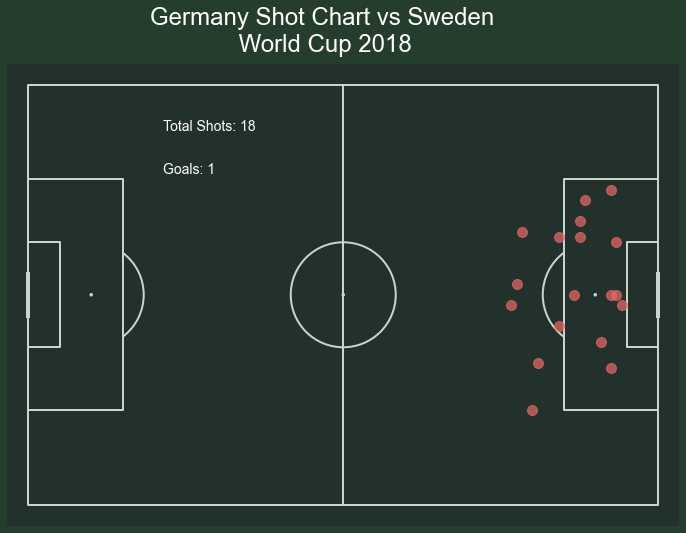

In [9]:
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#253d2d')
ax.patch.set_facecolor('#253d2d')

pitch = Pitch(pitch_type='statsbomb', orientation='vertical',pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),constrained_layout=False, tight_layout=True, view='half')

pitch.draw(ax=ax)

#plot the points, you can use a for loop to plot the different outcomes if you want
plt.scatter(gershots['x'],gershots['y'], s=100,c='#ea6969',alpha=.7)

s='Germany Shot Chart vs Sweden\n World Cup 2018'
plt.figtext(s=s,x=.49,y=.9,fontfamily='Arial',fontsize=24,color=text_color,horizontalalignment='center')

total_shots = len(gershots)

plt.figtext(s=f'Total Shots: {total_shots}',x=.32, y =.77, fontsize=14,fontfamily='Arial',color=text_color)
plt.figtext(s=f'Goals: 1',x=.32, y =.70, fontsize=14,fontfamily='Arial',color=text_color)

plt.savefig('GERvsSWEshotmap.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')